# Import library
This section for list of libraries that will use

In [1]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image
from PIL import Image
from shutil import copyfile
import matplotlib.pyplot as plt

Uses the commands `from` google.colab `import` drive and drive.mount `('/content/drive')` to link Google Drive with Google Colab, which allows you to access files and datasets stored on Google Drive and save code execution results to them.

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Then uses the zip file library to extract the contents of the zip file into the specified directory.

In [4]:
local_zip = '/content/drive/MyDrive/Colab_Notebooks/waste-dataset.zip'
extractdir = "./"
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(extractdir)
zip_ref.close()

# Split Data

We define a function called split_data which is used to split the dataset into training data and testing data based on the proportion specified by `SPLIT_SIZE`.



First, we use the function random.sample to randomize the order of the files in the source directory `(SOURCE)`. The results are stored in the `shuffled_source` variable, which is a shuffled list of files.



Next, we calculate the total number of files to use for the training data based on SPLIT_SIZE. The `training_number` variable stores this value.



Next, we use a for loop to iterate through each item in shuffled_source. Each item is represented by the full path item_source by concatenating SOURCE and item.



In the loop, we check if the file size `(os.path.getsize(item_source))` is equal to 0. If it is, then the file is assumed to be of zero length and is ignored. If not, then the file is copied `(using copyfile)` to the appropriate target directory `(target)` with the same name.



When the number of copied files `(i)` reaches training_number, we change the target to the TESTING directory. This means that subsequent files copied will go into the TESTING directory, thus dividing the dataset into training and test data according to the specified proportions.



Using the `split_data` function, you can split the dataset into training and test data by a certain proportion, based on a given source directory.



In [5]:
# Function split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    # Shuffle list
    shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
    # Find total number of files in training dir
    training_number = int(len(shuffled_source) * SPLIT_SIZE)
    i = 0
    target = TRAINING

    for item in shuffled_source:
        item_source = os.path.join(SOURCE, item)
        if os.path.getsize(item_source) == 0:
            print(f'{item} is zero length, so ignoring.')
        else:
            copyfile(item_source, os.path.join(target, item))
            i += 1

    # Switch copy target to TESTING
        if i == training_number:
            target = TESTING

We use source_path variable to store source directory path. Then, using `os.path.join`, we join the path with the `"O"` and `"R"` directories, which are stored in the `source_path_O` and `source_path_R` variables.

Next, using `os.listdir`, we get a list of files inside the `source_path_O` and `source_path_R` directories. By using the len function, we count the number of files in each of these directories, then print the results using the f-string.

By running this code, we can see how many files are in the `"O"` and `"R"` directories in the `'waste-dataset/imgWaste'` dataset.

In [6]:
source_path = './waste-dataset/imgWaste'

source_path_O = os.path.join(source_path, 'O')
source_path_R = os.path.join(source_path, 'R')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_O))} images of O.")
print(f"There are {len(os.listdir(source_path_R))} images of R.")

There are 13966 images of O.
There are 11111 images of R.


In the provided code, we define the variable root_dir to store the main directory path. If the directory already exists, we remove it using shutil.rmtree.

Next, we define a function called create_train_test_dirs that creates the necessary directory structure for the training and testing dataset. We use `os.makedirs` and `os.path.join` to create the "training" and "testing" directories within `root_dir`, each containing the subdirectories `"O"` and `"R"`.

Then, we attempt to execute the `create_train_test_dirs` function by passing `root_dir` as an argument. If a FileExistsError occurs, we print a message that should not be visible since the main directory has been deleted beforehand.

By running this code, we can create the appropriate directory structure for the training and testing dataset.

In [7]:
# Define root directory
root_dir = './waste-dataset/data'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(f'{root_path}/training', 'O'))
  os.makedirs(os.path.join(f'{root_path}/training', 'R'))
  os.makedirs(os.path.join(root_path, 'testing'))
  os.makedirs(os.path.join(f'{root_path}/testing', 'O'))
  os.makedirs(os.path.join(f'{root_path}/testing', 'R'))
  ### END CODE HERE


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In the provided code, we are testing the `create_train_test_dirs` function by iterating through the directories and subdirectories within the `root_dir`.

We use `os.walk` to traverse the directory tree starting from `root_dir`. For each directory encountered, we print the full path by combining rootdir and subdir using `os.path.join`. This allows us to verify the directory structure created by the `create_train_test_dirs` function.

By running this code, we can examine the directories and subdirectories within `root_dir` and ensure that the necessary directory structure for the training and testing dataset has been created.

In [8]:
# Test your create_train_test_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./waste-dataset/data/training
./waste-dataset/data/testing
./waste-dataset/data/training/R
./waste-dataset/data/training/O
./waste-dataset/data/testing/R
./waste-dataset/data/testing/O


In the provided code, we have a function called `split_data` which is used to split data into training and testing sets based on the specified `SPLIT_SIZE`.

Inside the function, we first shuffle the list of files in the SOURCE directory using random.sample. This ensures that the files are randomly ordered.

Next, we calculate the number of files that should be included in the training set based on the `SPLIT_SIZE`. The training_number is determined by multiplying the total number of files in SOURCE by `SPLIT_SIZE` and converting it to an integer.

We then iterate through each item `(file)` in the shuffled list. For each item, we check if its size is zero. If it is, we ignore it and print a message indicating that it has zero length. Otherwise, we copy the file from SOURCE to the target directory (which starts as the TRAINING directory) using copyfile from the shutil module. We also increment the counter i.

When the number of copied files (i) reaches the `training_number`, we switch the target directory to the TESTING directory. This ensures that the remaining files are copied to the testing directory.

By executing this code, the data from the SOURCE directory will be split into the training and testing directories based on the specified split size.

In [9]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  # Shuffle list
  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

  # Find total number of files in training dir
  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      copyfile(item_source, os.path.join(target, item))
      i += 1

    # Switch copy target to TESTING
    if i == training_number:
      target = TESTING
  ### END CODE HERE

In the provided code, we are testing the split_data function by splitting the data from the `"O"` and `"R"` source directories into training and testing directories.

First, we define the source directories (`O_SOURCE_DIR` and `R_SOURCE_DIR`) and the destination directories for training and testing (`TRAINING_DIR` and `TESTING_DIR`).

To ensure that the directories are empty in case the code is run multiple times, we check if they contain any files using `len(os.listdir)` and remove the files if present using `os.remove`.

Next, we define the split size (`split_size`), which determines the proportion of images used for training.

Then, we execute the `split_data` function twice, once for the `"O"` source directory and once for the `"R"` source directory. This splits the data into the corresponding training and testing directories based on the specified split size.

Finally, we check the number of images in the training and testing directories using `len(os.listdir)` and print the results.

By running this code, we can split the data from the `"O"` and `"R"` source directories into training and testing directories, and verify the number of images in each directory.

In [10]:
# Test your split_data function

# Define paths
O_SOURCE_DIR = "./waste-dataset/imgWaste/O"
R_SOURCE_DIR = "./waste-dataset/imgWaste/R"

TRAINING_DIR = "./waste-dataset/data/training/"
TESTING_DIR = "./waste-dataset/data/testing/"

TRAINING_O_DIR = os.path.join(TRAINING_DIR, "O/")
TESTING_O_DIR = os.path.join(TESTING_DIR, "O/")

TRAINING_R_DIR = os.path.join(TRAINING_DIR, "R/")
TESTING_R_DIR = os.path.join(TESTING_DIR, "R/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_O_DIR)) > 0:
  for file in os.scandir(TRAINING_O_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_DIR)) > 0:
  for file in os.scandir(TRAINING_R_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_O_DIR)) > 0:
  for file in os.scandir(TESTING_O_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_R_DIR)) > 0:
  for file in os.scandir(TESTING_R_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(O_SOURCE_DIR, TRAINING_O_DIR, TESTING_O_DIR, split_size)
split_data(R_SOURCE_DIR, TRAINING_R_DIR, TESTING_R_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_O_DIR))} images of O for training")
print(f"There are {len(os.listdir(TRAINING_R_DIR))} images of R for training")
print(f"There are {len(os.listdir(TESTING_O_DIR))} images of O for testing")
print(f"There are {len(os.listdir(TESTING_R_DIR))} images of R for testing")



There are 12569 images of O for training
There are 9999 images of R for training
There are 1397 images of O for testing
There are 1112 images of R for testing


# Augmentation
In the provided code, we have a function called `train_val`_generators that creates and returns generator objects for training and validation data.

Inside the function, we instantiate two ImageDataGenerator objects, one for training data (`train_datagen`) and one for validation data (`validation_datagen`). The rescale argument is set to `1./255`. to normalize the pixel values of the images.

We then use the `flow_from_directory` method of each ImageDataGenerator object to create generator objects. For the training generator, we pass the `TRAINING_DIR` directory as the directory argument, set the `batch_size` to 32, specify class_mode as 'binary' since it's a binary classification problem, and set the` target_size` to (64, 64) to resize the images.

Similarly, for the validation generator, we pass the `VALIDATION_DIR` directory as the directory argument and set the same parameters as the training generator.

Finally, we return the train_generator and `validation_generator` objects.

By using these generator objects, we can efficiently load and preprocess the training and validation data for model training and evaluation.

In [11]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(64, 64))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(64, 64))
  ### END CODE HERE
  return train_generator, validation_generator

In [12]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22568 images belonging to 2 classes.
Found 2509 images belonging to 2 classes.


# Create Model

This introduction discusses the implementation of a model using transfer learning with the MobileNetV1 architecture. Transfer learning allows us to utilize the pre-trained MobileNetV1 model from TensorFlow Hub for our specific task. We create a model by incorporating the MobileNetV1 architecture as a feature extractor, adding additional layers on top for classification. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric. By leveraging transfer learning and MobileNetV1, we aim to develop an efficient and accurate model. Let's explore the implementation and evaluate its performance.

In [13]:
mobilenetv1 = "https://tfhub.dev/google/imagenet/mobilenet_v1_025_224/classification/5"
def create_model():
  tl_layer = hub.KerasLayer(mobilenetv1, input_shape=(64, 64, 3), trainable=False)
  model = tf.keras.models.Sequential([
      tl_layer,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

# Train Model

In this introduction, we will discuss the training process of our model. We start by obtaining the untrained model using the `create_model()` function. The model consists of a MobileNetV1 feature extractor and additional classification layers.

Next, we train the model using the `train_generator` for training data and `validation_generator` for validation data. The training process involves running 20 epochs, with 705 steps per epoch for training and 78 steps for validation.

Please note that the training process may take some time, and it is essential to monitor the training progress and evaluate the model's performance.

Let's explore the training process and analyze the history to gain insights into the model's learning and performance.

In [14]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch = 705,
                    validation_steps = 78,
                    validation_data=validation_generator)

Epoch 1/20
705/705 [==============================] - 66s 90ms/step - loss: 0.4611 - accuracy: 0.8523 - val_loss: 0.3339 - val_accuracy: 0.8698
Epoch 2/20
705/705 [==============================] - 70s 99ms/step - loss: 0.2989 - accuracy: 0.8767 - val_loss: 0.3064 - val_accuracy: 0.8802
Epoch 3/20
705/705 [==============================] - 66s 94ms/step - loss: 0.2790 - accuracy: 0.8868 - val_loss: 0.3024 - val_accuracy: 0.8766
Epoch 4/20
705/705 [==============================] - 67s 94ms/step - loss: 0.2627 - accuracy: 0.8941 - val_loss: 0.3056 - val_accuracy: 0.8770
Epoch 5/20
705/705 [==============================] - 80s 114ms/step - loss: 0.2518 - accuracy: 0.8976 - val_loss: 0.3080 - val_accuracy: 0.8822
Epoch 6/20
705/705 [==============================] - 67s 95ms/step - loss: 0.2424 - accuracy: 0.9015 - val_loss: 0.3193 - val_accuracy: 0.8834
Epoch 7/20
705/705 [==============================] - 63s 89ms/step - loss: 0.2315 - accuracy: 0.9082 - val_loss: 0.3131 - val_accuracy

we will discuss adding a summary of our model. After training the model, it is beneficial to examine its architecture and parameters. By calling the `model.summary()` function, we can obtain a summary that provides an overview of the model's layers, output shapes, and the total number of parameters.

Analyzing the model summary allows us to gain insights into the model's structure and complexity. It helps in understanding the flow of information and the number of trainable parameters. This information is crucial for assessing the model's capacity and identifying potential areas for optimization.

Let's add the model summary to our implementation and explore its details.

In [15]:
#Menambahkan summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              475801    
                                                                 
 dense (Dense)               (None, 128)               128256    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 604,186
Trainable params: 128,385
Non-trainable params: 475,801
_________________________________________________________________



We retrieve the accuracy and loss values from the history object and plot them to observe the model's performance over the epochs.

The accuracy plot illustrates the training and validation accuracy, indicating how well the model performs on both datasets. The loss plot represents the training and validation loss, indicating the amount of error during the training process.

By analyzing these plots, we can evaluate the model's learning progress, identify potential overfitting or underfitting issues, and make informed decisions for further optimization.

Let's visualize the training and validation results to gain insights into the model's performance.






Text(0.5, 1.0, 'Training and validation loss')

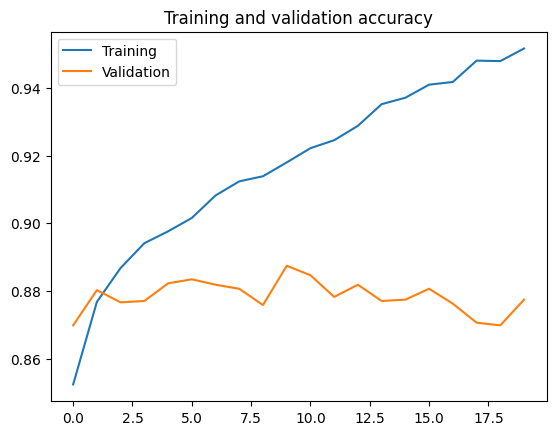

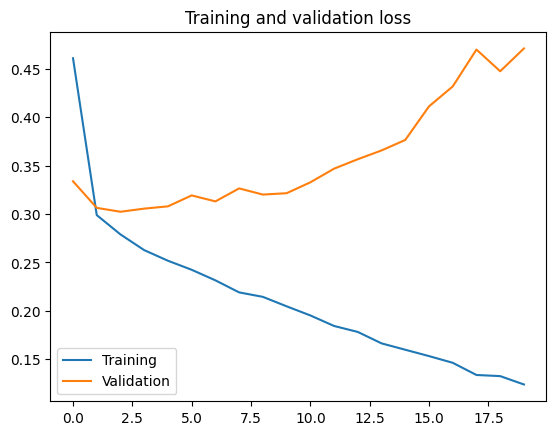

In [16]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# Testing Model

We load the test image using the image.load_img() function and specify the target size as (64, 64). This resizing ensures that the image is compatible with the input size expected by our model.

By using a specific test image, we can evaluate how well our model performs on organic waste classification. This allows us to assess the model's ability to correctly classify the given image and make predictions based on its features.

Let's proceed with loading the test image and examining its suitability for our model.

In [ ]:
# organic image
test_image = image.load_img('./waste-dataset/data/testing/O/O_19.jpg',target_size = (64, 64))

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 0s 396ms/step


In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
if result[0][0] > 0.5:
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

prediction


'Organic'

# Save & Export Model with TfLite

In [ ]:
# run_model = tf.function(lambda x: model(x))

# concrete_funct = run_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
# tf.saved_model.save(
#     model, 'tf2-save', signatures={
#         tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY: concrete_funct})
!mkdir -p saved_model
model.save('./tf2-save')

INFO:tensorflow:Assets written to: ./tf2-save\assets


INFO:tensorflow:Assets written to: ./tf2-save\assets


In [ ]:
saved_model_dir = './tf2-save'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)